In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Tensorflow version: 2.7.0
Keras version: 2.7.0


## 1. Loading the dataset

In [ ]:
#load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


### 1.1. Splitting Data into Train, Valid & Test

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_nums = len(class_names)

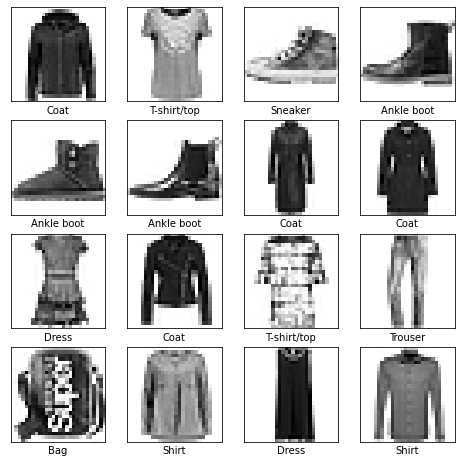

In [ ]:
plt.figure(figsize=(8,8))
for i in range(16):
  ax = plt.subplot(4,4,i+1)
  ax.imshow(X_train[i], cmap=plt.cm.binary)
  ax.set(xticks=[], yticks=[], xlabel=class_names[y_train[i]])

## 2. Create ANN with Sequential API
- `"sparse_categorical_crossentropy"` loss because we have sparse labels: (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. 
- `"categorical_crossentropy"`: If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. 

- For  **binary classification** or multilabel binary classification, then we would use the `"sigmoid"` (i.e., logistic) activation function in the output layer instead of the `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), #to convert each input image into a 1D array
    keras.layers.Dense(300, activation="relu"), #dense hidden layer with 300 neurons. It will use the ReLU activation function.
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") #output layer: using softmax as Activation function       

])
# model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
epochs = 30
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7092 - accuracy: 0.7669 - val_loss: 0.4931 - val_accuracy: 0.8372
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4861 - accuracy: 0.8325 - val_loss: 0.4334 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4417 - accuracy: 0.8450 - val_loss: 0.4079 - val_accuracy: 0.8610
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4153 - accuracy: 0.8548 - val_loss: 0.4022 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3947 - accuracy: 0.8618 - val_loss: 0.3921 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3799 - accuracy: 0.8661 - val_loss: 0.3648 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3655 - accuracy: 0.8707 - val_loss: 0.3644 - val_accuracy:

- The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

In [ ]:
history_df = pd.DataFrame(history.history)

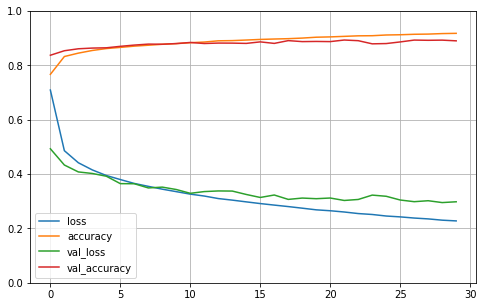

In [ ]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

In [ ]:
test_loss, test_acc  = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8824
Test accuracy: 0.8823999762535095


## 3. Prediciton

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
np.argmax(y_proba, axis = 1)

array([9, 2, 1])

In [ ]:
predictions = model.predict(X_test)

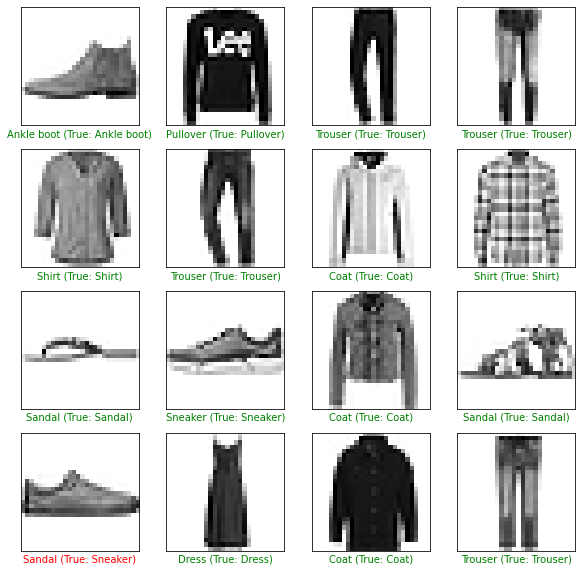

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
  ax = plt.subplot(4,4,i+1)
  ax.imshow(X_test[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  color = 'red' if predicted_label != y_test[i] else 'green'
  ax.set(xticks=[], yticks=[])
  ax.set_xlabel(f"{class_names[predicted_label]} (True: {class_names[y_test[i]]})", color=color) #Setting Label Color